In [1]:
# Import necessary libraries
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


### Reading the dataset

In [2]:
# Read the file "dataset.csv" as a Pandas dataframe 
df = pd.read_csv("dataset.csv")


In [3]:
# Assign the values of column x as the predictor
x = df[['x']].values

# Assign the values of column y as the response variable
y = df.y.values


### Train-validation split

In [4]:
### edTest(test_random) ###
# Split the data into train and validation sets with 75% for training 
# and with a random_state=1
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=1)


### Computing the MSE

In [5]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, validation_error, cross_validation_error = [],[],[]

# Loop through the degrees of the polynomial
for d in range(maxdeg):
    
    # Compute the polynomial features for the entire data
    x_poly = PolynomialFeatures(degree=d).fit_transform(x)

    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(degree=d).fit_transform(x_val)

    # Initialize a Linear Regression object
    lreg = LinearRegression(fit_intercept = False)
  
    # Fit model on the training set
    lreg.fit(x_poly_train,y_train)

    # Predict on the training data
    y_train_pred = lreg.predict(x_poly_train)

    # Predict on the validation set
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the mse on the train data
    training_error.append(mean_squared_error(y_train,y_train_pred))

    # Compute the mse on the validation data
    validation_error.append(mean_squared_error(y_val,y_val_pred))
    
    # Perform cross-validation on the entire data with 10 folds and 
    # get the mse_scores
    mse_score = cross_validate(lreg,x_poly,y,cv=10,scoring="neg_mean_squared_error",return_train_score=False)

    # Compute the mean of the cross validation error and store in list 
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function 
    cross_validation_error.append(-1*np.mean(mse_score['test_score']))
    

### Finding the best degree

In [7]:
### edTest(test_best_degree) ###

# Get the best degree associated with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)


# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

# Print the values
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)


The best degree of the model using validation is 2
The best degree of the model using cross-validation is 2


### Plotting the error graph

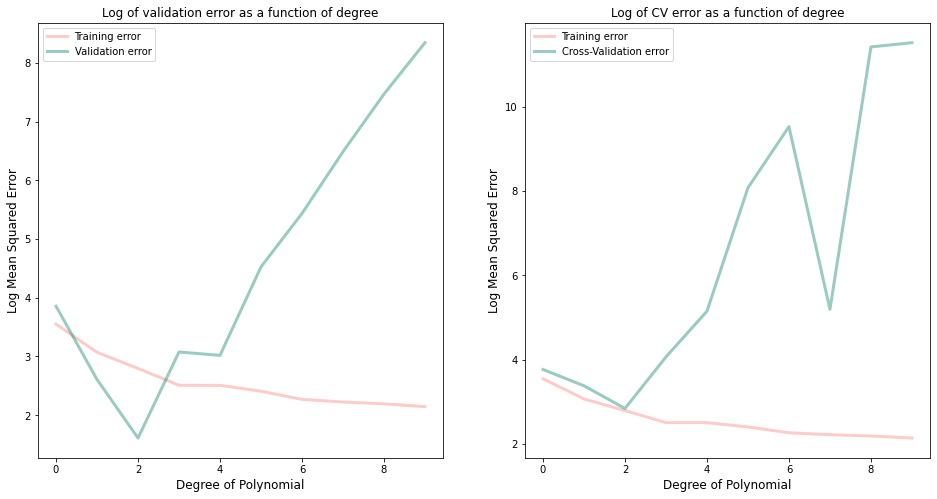

In [8]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();


⏸ If you run the exercise with a random state of 0, do you notice any change? What conclusion can you draw from this experiment?


In [9]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below 
answer1 = 'Though after chainging random state to 0 cross validtion mse remains same'
